In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# START of original watershed example
# from https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html

img = cv2.imread('example_data/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
marker_count, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

segmented = cv2.watershed(img,markers)

# END of original watershed example

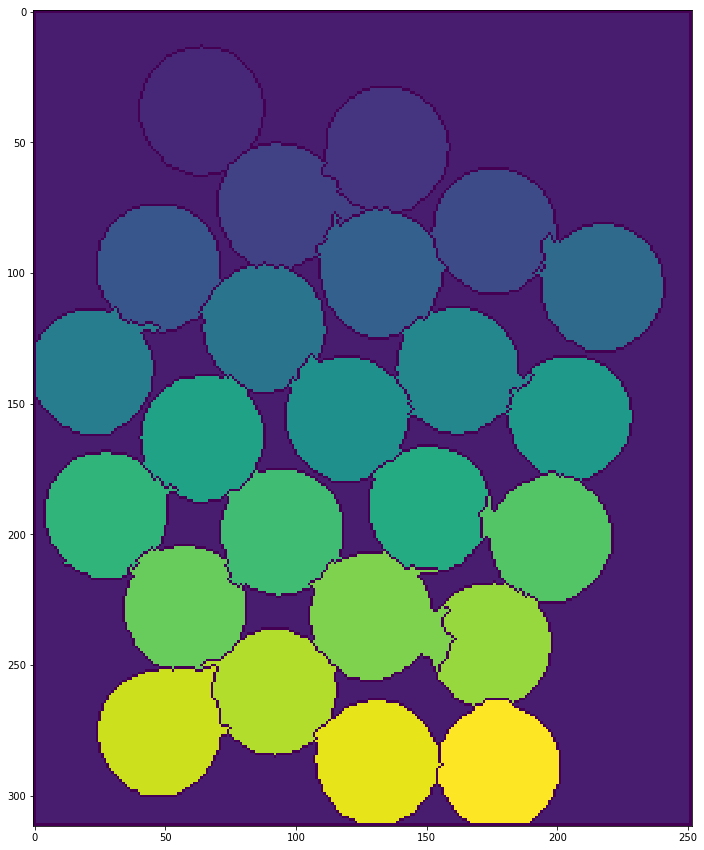

In [2]:
fig = plt.figure(figsize=(15,15))
plt.imshow(segmented)

In [3]:
segmented_bin = segmented.copy()
segmented_bin[segmented < 2] = 0
segmented_bin[segmented > 1] = 255
label_image = np.
num_labels, label_image = cv2.connectedComponents(segmented_bin.astype('uint8'), 4, cv2.CV_16U, cv2.CCL_GRANA)

Number of regions: 2


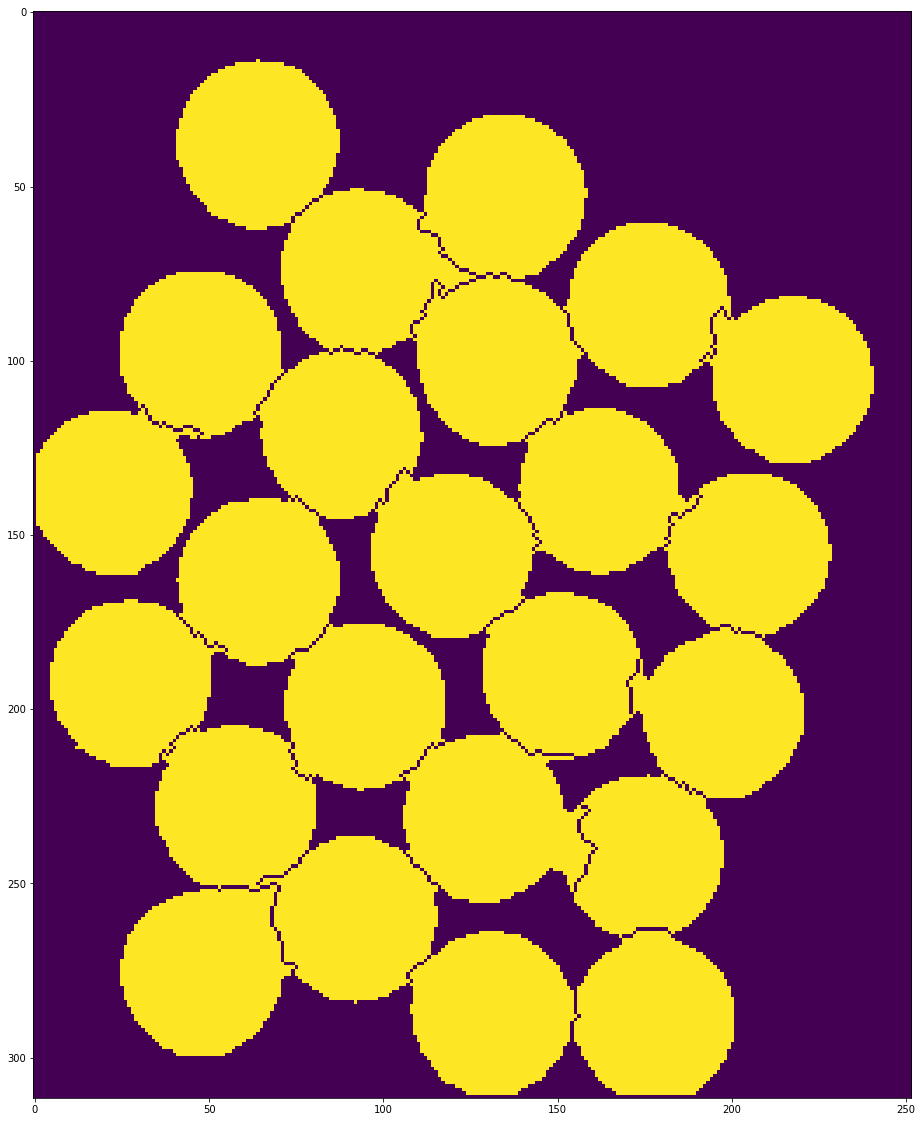

In [4]:
fig = plt.figure(figsize=(20,20))
print("Number of regions: {}".format(num_labels))
plt.imshow(segmented_bin)

In [5]:
#plt.imsave("CoinsSegmented.PNG", segmented_bin)